# TF-IDF Vectorizer

In [37]:
import pandas as pd
import numpy as np
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, balanced_accuracy_score

from util import summary_report

## Read the data

In [38]:
df = pd.read_csv("../../data/cleaned_reviews.tsv", sep="\t")

## Defining a helpful review + Splitting the data

In [39]:
split = 0.01

df["helpful"] = np.where(df.voteSuccess >= split, 1, 0)

x_train, x_test, y_train, y_test = train_test_split(df.reviewText, df.helpful, test_size=0.25, random_state=30)
f"x_train: {x_train.shape}, y_train: {y_train.shape}, x_test: {x_test.shape}, y_test: {y_test.shape}"

'x_train: (107391,), y_train: (107391,), x_test: (35797,), y_test: (35797,)'

## Vectorization with TF-IDF

In [40]:
vectorizer = TfidfVectorizer(ngram_range=(1, 1), min_df=0.01)
tfidf_train = vectorizer.fit_transform(x_train.values.astype('U'))
tfidf_test = vectorizer.transform(x_test.values.astype('U'))

## Fitting

In [41]:
clf = LinearSVC(random_state=0, max_iter=10000)

clf.fit(tfidf_train, y_train)
y_test_pred = clf.predict(tfidf_test)

## Result

Document-term Matrix(TF-IDF Vectorizer) - SVM/SVC
              precision    recall  f1-score   support

   Unhelpful       0.87      0.99      0.93     30806
     Helpful       0.68      0.08      0.14      4991

    accuracy                           0.87     35797
   macro avg       0.78      0.53      0.53     35797
weighted avg       0.84      0.87      0.82     35797

Balanced acc score:  0.06985525318682773


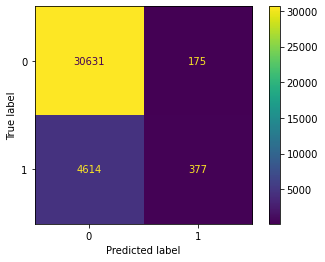

In [42]:
summary_report(y_test, y_test_pred, "Document-term Matrix(TF-IDF Vectorizer) - SVM/SVC")

# Neural Network

In [43]:
from sklearn.neural_network import MLPClassifier

# Using lbfgs over adam as it is much faster on smaller datasets(1min vs 6min(42k samples on M1 macbook air))
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(100,), max_iter=1000, random_state=1)

clf.fit(tfidf_train, y_train)
y_test_pred = clf.predict(tfidf_test)

/Users/apb/Library/Caches/pypoetry/virtualenvs/amazon-sentiment-53yd7LNS-py3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier
              precision    recall  f1-score   support

   Unhelpful       0.89      0.89      0.89     30806
     Helpful       0.31      0.29      0.30      4991

    accuracy                           0.81     35797
   macro avg       0.60      0.59      0.59     35797
weighted avg       0.81      0.81      0.81     35797

Balanced acc score:  0.18501841911818606


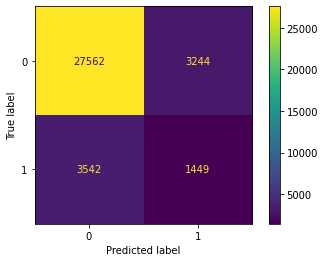

In [44]:
summary_report(y_test, y_test_pred, "MLPClassifier")